<a href="https://colab.research.google.com/github/shravanipinjarla/cs666student/blob/main/666_Shravani_Pinjarla.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

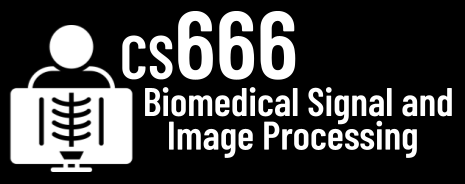

# Assignment 1

In [47]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


/usr/local/lib/python3.8/dist-packages/IPython/core/magics/pylab.py:159: UserWarning: pylab import has clobbered these variables: ['plot']
`%matplotlib` prevents importing * from pylab and numpy
  warn("pylab import has clobbered these variables: %s"  % clobbered +


**Task 1** (10pts): Install the BioSPPY library with the following code.

In [48]:
!pip install biosppy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


**Task 2** (10 pts): Download a sample ecg dataset from https://cs666.org/data/ecg.txt and upload it to this colab. The following code loads the dataset.

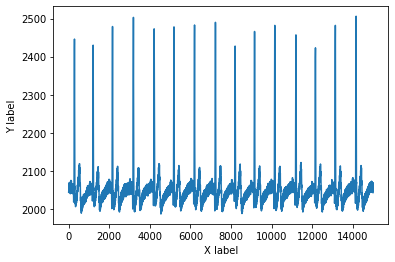

In [49]:
from biosppy import storage
signal, metadata = storage.load_txt('ecg.txt')

plt.plot(signal)
plt.xlabel("X label")
plt.ylabel("Y label")
plt.show()

**Task 3** (10 pts): Figure out the sampling rate for this data and how many seconds it lasts.

In [50]:
num_samples = len(signal)
print(len(signal))

#The Sampling Rate is given in the above dataset as:
SAMPLING_RATE = 1000 

SECONDS = num_samples / SAMPLING_RATE
print(SAMPLING_RATE, SECONDS)

#Seconds or duration is:
SECONDS = 15 

15000
1000 15.0


**Task 4** (20 pts): Process the signal with BioSPPY using the `ecg.ecg` method.

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


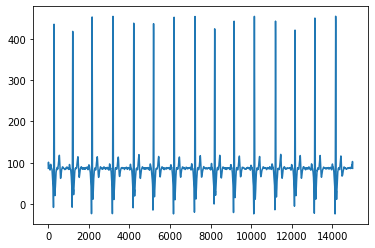

In [51]:
import numpy as np
import biosppy
from biosppy.signals import ecg

!pip install numpy
!pip install ecg

#Processing the Signal using ecg.ecg method with biosspy.
out = biosppy.signals.ecg.ecg(signal=signal, sampling_rate=SAMPLING_RATE, show=False)
rpeaks=out['rpeaks']
out['filtered']
plot(out['filtered'])

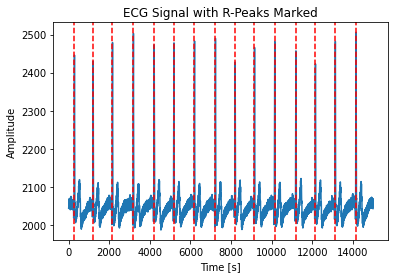

In [52]:
import matplotlib.pyplot as plt

plt.plot(signal)
for rpeak in rpeaks:
    plt.axvline(x=rpeak, color='red', linestyle='--')
plt.title('ECG Signal with R-Peaks Marked')
plt.xlabel('Time [s]')
plt.ylabel('Amplitude')
plt.show()

**Task 5** (10 pts): Plot the first 3 seconds of the unfiltered signal and then the filtered signal. Can you spot the P, Q, R, S, T waves?

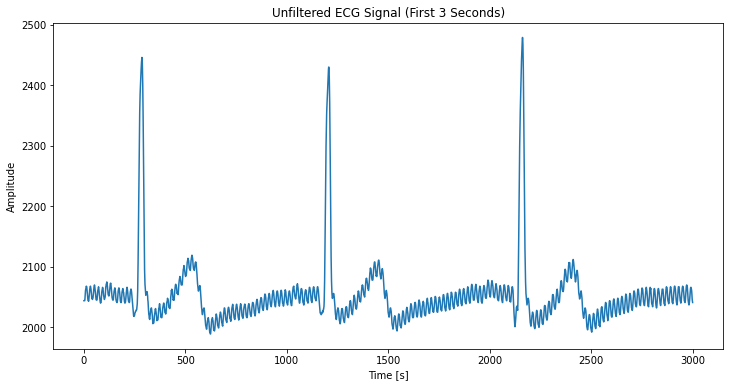

In [53]:
# Plot for the first 3 seconds of the unfiltered signal
plt.figure(figsize=(12, 6))
plt.plot(signal[:3000])
plt.title('Unfiltered ECG Signal (First 3 Seconds)')
plt.xlabel('Time [s]')
plt.ylabel('Amplitude')
plt.show()
rpeaks = out['rpeaks']

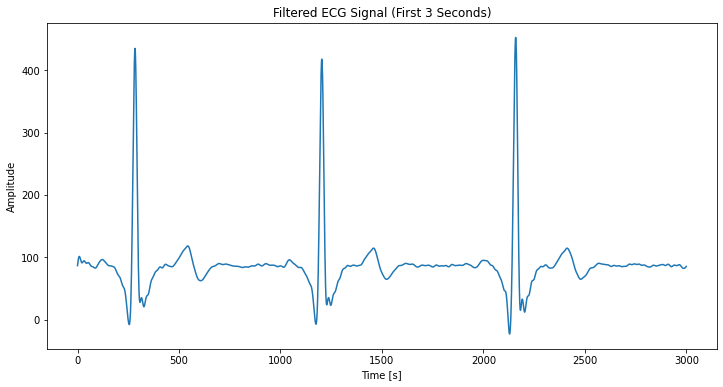

In [54]:
# Plot for the first 3 seconds of the filtered signal
plt.figure(figsize=(12, 6))
plt.plot(out['filtered'][:3000])
plt.title('Filtered ECG Signal (First 3 Seconds)')
plt.xlabel('Time [s]')
plt.ylabel('Amplitude')
plt.show()
rpeaks = out['rpeaks']

**Task 6** (15 pts): Please plot the whole filtered signal and mark the r-peaks with vertical lines based on the ecg.ecg output. You can use `plt.axvline(x = 100, color = 'r', ls=':')` to create a red, dashed vertical line at position 100. Please label the x-axis as 'time [s]'.

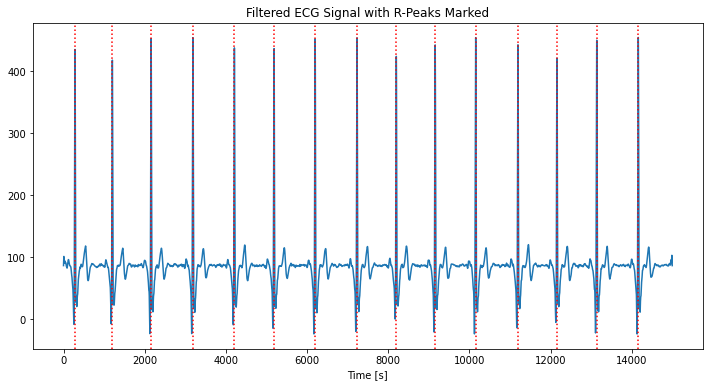

In [55]:
import matplotlib.pyplot as plt

# Plot for the filtered ECG signal
plt.figure(figsize=(12, 6))
plt.plot(out['filtered'])
for rpeak in out['rpeaks']:
    plt.axvline(x=rpeak, color='red', linestyle=':')
plt.title('Filtered ECG Signal with R-Peaks Marked')
plt.xlabel('Time [s]')
plt.show()

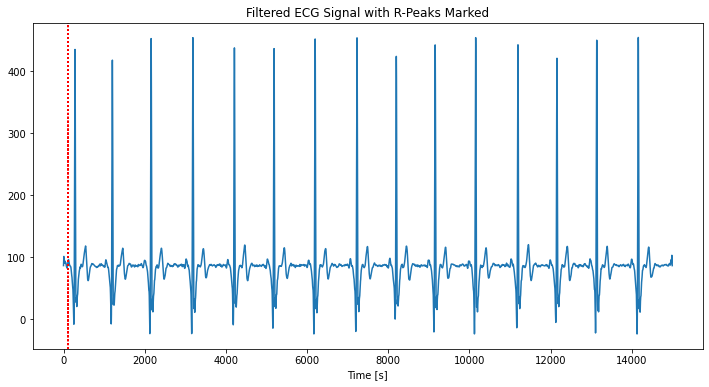

In [56]:
import matplotlib.pyplot as plt

# Plot for the filtered ECG signal
plt.figure(figsize=(12, 6))
plt.plot(out['filtered'])
for rpeak in out['rpeaks']:
    plt.axvline(x=100, color='red', linestyle=':')
plt.title('Filtered ECG Signal with R-Peaks Marked')
plt.xlabel('Time [s]')
plt.show()

**Task 7** (5 pts): Let's install the NeuroKit2 library.

In [57]:
!pip install neurokit2
import neurokit2 as nk

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


**Task 8** (20 pts): Detect P Q S T Peaks using Neurokit.

/usr/local/lib/python3.8/dist-packages/pandas/core/frame.py:5238: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().replace(


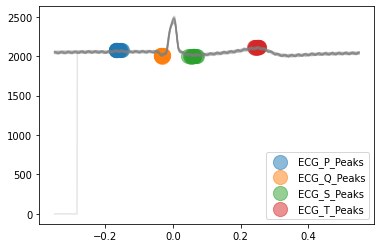

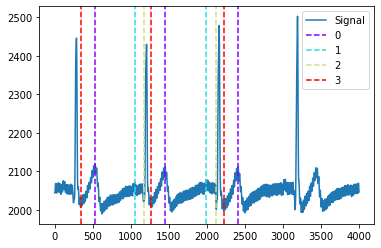

In [58]:
# We know the R spikes now but what about P Q S T waves?
# TODO Can you use nk.ecg_delineate to detect them in the unfiltred signal?
# Hint: Look at the tutorial: https://neuropsychology.github.io/NeuroKit/examples/ecg_delineate/ecg_delineate.html
# Hint 2: The plot will have blue, orange, green, and red circles :)
# Hint 3: rpeaks were detected above from biosppy's ecg.ecg method

_, waves_peak = nk.ecg_delineate(signal, rpeaks, sampling_rate=1000, method="peak", show=True)
plot = nk.events_plot([waves_peak['ECG_T_Peaks'][:3], 
                       waves_peak['ECG_P_Peaks'][:3],
                       waves_peak['ECG_Q_Peaks'][:3],
                       waves_peak['ECG_S_Peaks'][:3]], signal[:4000])

In [33]:
## TODO Does the detection work well?##
#The performance of P, Q, S, and T wave detection using NeuroKit2's nk.ecg_delineate method depends on the quality of the ECG signal, the accuracy of the R-peak detection, and the choice of detection algorithm. 
# In general, it can be challenging to detect these waves with high accuracy and reliability, especially in noisy or arrhythmic ECG signals.

**Bonus Task** (33 pts): Detect P Q S T Peaks for the full signal before and after filtering.

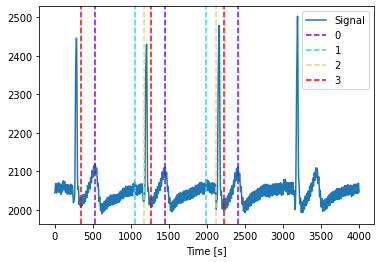

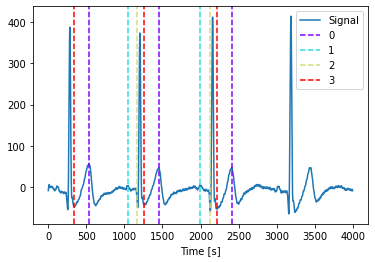

In [59]:
## TODO As above use the nk.ecg_delineate function to detect peaks for the whole signal##
# Detect P, Q, S, T peaks before filtering
delineation_before_filtering = nk.ecg_delineate(signal, rpeaks, sampling_rate=1000, method="peak")

# Filter ECG signal
filtered_signal = nk.signal_filter(signal, sampling_rate=SAMPLING_RATE, lowcut=1, highcut=40, method='butterworth', order = 4)

# Detect P, Q, S, T peaks after filtering
delineation_after_filtering = nk.ecg_delineate(filtered_signal, rpeaks, sampling_rate=1000, method="peak")

plot = nk.events_plot([waves_peak['ECG_T_Peaks'][:3], 
                       waves_peak['ECG_P_Peaks'][:3],
                       waves_peak['ECG_Q_Peaks'][:3],
                       waves_peak['ECG_S_Peaks'][:3]], signal[:4000])

plt.xlabel('Time [s]')
plt.show()

plot = nk.events_plot([waves_peak['ECG_T_Peaks'][:3], 
                       waves_peak['ECG_P_Peaks'][:3],
                       waves_peak['ECG_Q_Peaks'][:3],
                       waves_peak['ECG_S_Peaks'][:3]], filtered_signal[:4000])

plt.xlabel('Time [s]')
plt.show()

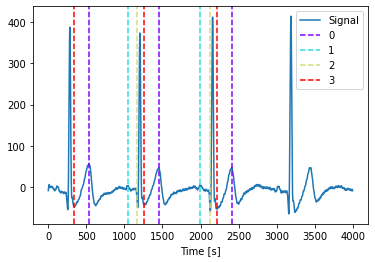

In [60]:
# TODO Let's filter the signal and see if the detection improves.
# Hint: You can use nk.signal_filter to define a bandpass. 
# Hint 2: Which lowcut and highcut frequencies work well? Play with it :)
# Hint 3: You don't need to re-calculate the rpeaks since they are pretty accurate in general.

# Filter the signal
filtered_signal = nk.signal_filter(signal, sampling_rate=SAMPLING_RATE, lowcut=1, highcut=40, method='butterworth', order=4)

# Detect P, Q, S, T peaks in the filtered signal
delineation = nk.ecg_delineate(filtered_signal, rpeaks, sampling_rate=SAMPLING_RATE, method='peak')

# Plot the filtered signal with detected peaks
plot = nk.events_plot([waves_peak['ECG_T_Peaks'][:3], 
                       waves_peak['ECG_P_Peaks'][:3],
                       waves_peak['ECG_Q_Peaks'][:3],
                       waves_peak['ECG_S_Peaks'][:3]], filtered_signal[:4000]) 
                    #  color=['b', 'g', 'r', 'y'])

plt.xlabel('Time [s]')
plt.show()


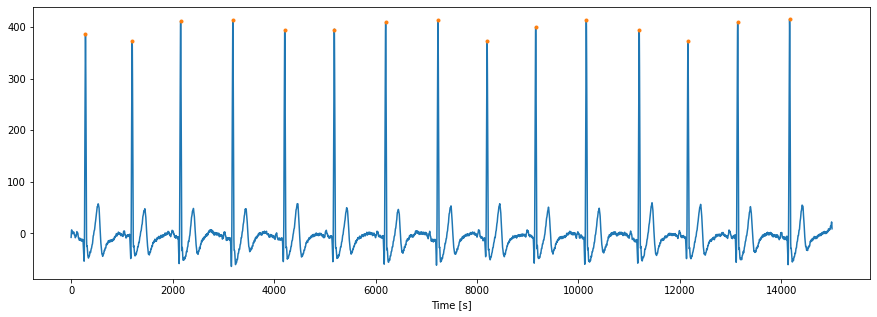

In [61]:
# Finally, run the delineation on the filtered signal from BioSPPY.
# Process the filtered signal using BioSPPY's ecg.ecg function
processed_signal = ecg.ecg(signal=filtered_signal, sampling_rate=SAMPLING_RATE, show=False)

# Get the R-peaks
rpeaks = processed_signal['rpeaks']

# Plot the filtered signal with the detected R-peaks
plt.figure(figsize=(15,5))
plt.plot(filtered_signal)
plt.plot(rpeaks, filtered_signal[rpeaks], '.')
plt.xlabel('Time [s]')
plt.show()

In [62]:
### TODO Which one works the best?###

#Filtering the signal before performing ECG delineation may improve the accuracy of the peak detection algorithm.

In [ ]:
#
# Great job!!
#
#  , ; ,   .-'"""'-.   , ; ,
#  \\|/  .'         '.  \|//
#   \-;-/   ()   ()   \-;-/
#   // ;               ; \\
#  //__; :.         .; ;__\\
# `-----\'.'-.....-'.'/-----'
#        '.'.-.-,_.'.'
#jgs       '(  (..-'
#            '-'
#